<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [23.4 Numerical Error and Instability](chapter23.04-Numerical-Error-and-Instability.ipynb) | [Contents](Index.ipynb) | [23.6 Summary and Problems](chapter23.06-Summary-and-Problems.ipynb) >

# Python ODE Solvers (BVP)

In *scipy*, there are also a basic solver for solving the boundary value problems, that is the *scipy.integrate.solve_bvp* function. The function solves a first order system of ODEs subject to two-point boundary conditions. The function construction are shown below:

**CONSTRUCTION:**  

Let $F$ be a function object to the function that computes 

$$\frac{dy}{dx} = F(t, S(t))$$
$$S(t0)=S0$$

$t$ is a one-dimensional independent variable (time), $S(t)$ is an n-dimensional vector-valued function (state), and the $F(t, S(t))$ defines the differential equations. $S0$ be an initial value for $S$. The function $F$ *must* have the form $dS = F(t, S)$, although the name does not have to be $F$. The goal is to find the $S(t)$ approximately satisfying the differential equations, given the initial value $S(t0)=S0$. 

The way we use the solver to solve the differential equation is: $$solve\_ivp(fun, t\_span, s0, method = 'RK45', t\_eval=None)$$

where $fun$ takes in the function in the right-hand side of the system. $t\_span$ is the interval of integration $(t0, tf)$, where $t0$ is the start and $tf$ is the end of the interval. $s0$ is the initial state. There are a couple of methods that we can choose, the default is 'RK45', which is the explicit Runge-Kutta method of order 5(4). There are other methods you can use as well, see the end of this section for more information. $t\_eval$ takes in the times at which to store the computed solution, and must be sorted and lie within $t\_span$. 

Let's try one example below. 

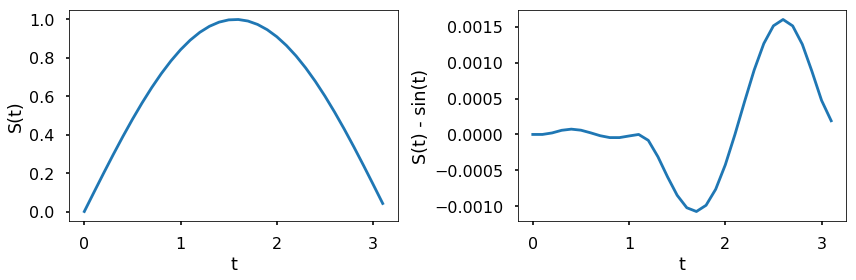

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

In [22]:
def fun(t, y):
    print(y[1].shape)
    return np.vstack((y[1], -9.8))

f = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [23]:
t = np.linspace(0, 5, 11)

y_a = np.zeros((2, t.size))
y_a[-1]= 50

res_a = solve_bvp(f, bc, t, y_a)

ValueError: setting an array element with a sequence.

In [30]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(0, 1, 5)

y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
#y_b[0] = 3

In [27]:
res_a = solve_bvp(fun, bc, x, y_a)

/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/qingkaikong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


ValueError: setting an array element with a sequence.

In [31]:
res_b = solve_bvp(fun, bc, x, y_a)

In [7]:
res_a.y

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: None
 rms_residuals: array([9.86500717e-05, 1.05360602e-04, 1.05360602e-04, 9.86500717e-05])
           sol: <scipy.interpolate.interpolate.PPoly object at 0x1832058938>
        status: 0
       success: True
             x: array([0.  , 0.25, 0.5 , 0.75, 1.  ])
             y: array([[ 0.00000000e+00,  1.04784145e-01,  1.40534773e-01,
         1.04784145e-01,  0.00000000e+00],
       [ 5.49349275e-01,  2.84320977e-01, -1.28752555e-18,
        -2.84320977e-01, -5.49349275e-01]])
            yp: array([[ 5.49349275e-01,  2.84320977e-01, -1.28752555e-18,
        -2.84320977e-01, -5.49349275e-01],
       [-1.00000000e+00, -1.11047088e+00, -1.15088910e+00,
        -1.11047088e+00, -1.00000000e+00]])

The above figure shows the corresponding numerical results. As in the previous example, the difference between the result of *solve\_ivp* and the evaluation of the analytical solution by Python is very small in comparison to the value of the function.

**EXAMPLE:**

Let the state of a system be defined by $S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$, and let the evolution of the system be defined by the ODE

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
$$

Use *solve\_ivp* to solve this ODE for the time interval $[0, 10]$ with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$. Plot the solution in ($x(t), y(t)$).

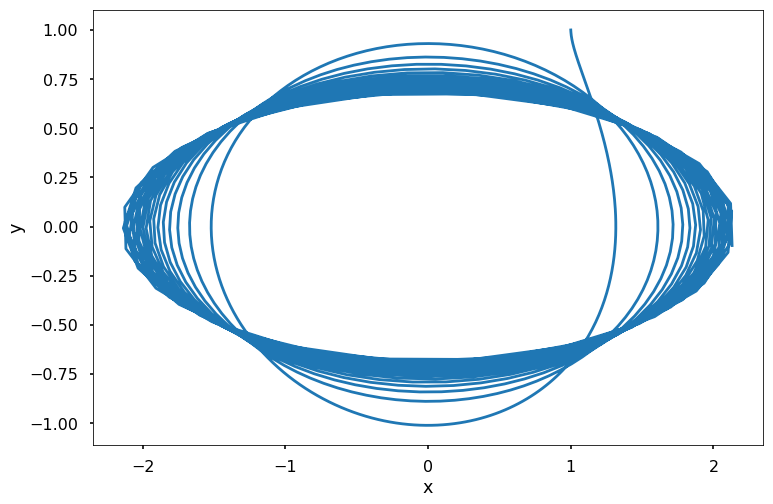

In [4]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In practice, some ODEs have bad behavior known as **stiffness**. Loosely speaking, stiffness refers to systems that can have very sharp changes in derivative. An example of a stiff system is a bouncing ball, which
suddenly changes directions when it hits the ground. Depending on the properties of the ODE you are solving and the desired level of accuracy, you might need to use different methods for *solve\_ivp*. There are many methods that you can choose for the *method* argument in *solve\_ivp*, take a look of the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) to understand it more. As suggested by the documentation, you should use the 'RK45' or 'RK23' method for non-stiff problems and 'Radau' or 'BDF' for stiff problems. If not sure, first try to run 'RK45'. If needs unusually many iterations, diverges, or fails, your problem is likely to be stiff and you should use 'Radau' or 'BDF'. 'LSODA' can also be a good universal choice, but it might be somewhat less convenient to work with as it wraps old Fortran code.

<!--NAVIGATION-->
< [23.4 Numerical Error and Instability](chapter23.04-Numerical-Error-and-Instability.ipynb) | [Contents](Index.ipynb) | [23.6 Summary and Problems](chapter23.06-Summary-and-Problems.ipynb) >